# **Mini-Projeto 8 Rainhas**
*Kevin Andrews*<br/>
*Aline Gouveia*<br/>
<br/>
**Representação (genótipo)**: string de bits <br/>
**Recombinação**: “cut-and-crossfill” crossover<br/>
**Probabilidade de Recombinação**: 90%<br/>
**Mutação**: troca de genes<br/>
**Probabilidade de Mutação**: 40%<br/>
**Seleção de pais**: ranking - Melhor de 2 de 5 escolhidos aleatoriamente<br/>
**Seleção de sobreviventes**: substituição do pior<br/>
**Tamanho da população**: 100<br/>
**Número de filhos gerados**: 2<br/>
**Inicialização**: aleatória<br/>
**Condição de término**: Encontrar a solução, ou 10.000 avaliações de fitness<br/>
**Fitness**: O fitness será 1/(1 + penalidade), onde a penalidade é o número de ataques que as rainhas estão fazendo contra outras rainhas em uma configuração<br/>
<br/>

# O problema das 8 rainhas
<br/>O problema das 8 rainhas consiste em colocar as 8 rainhas em um tabuleiro 8x8 de tal forma que nenhuma delas se ataque.
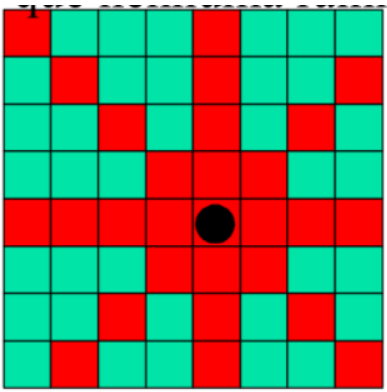



# Representação

**Fenótipo**:
<br/>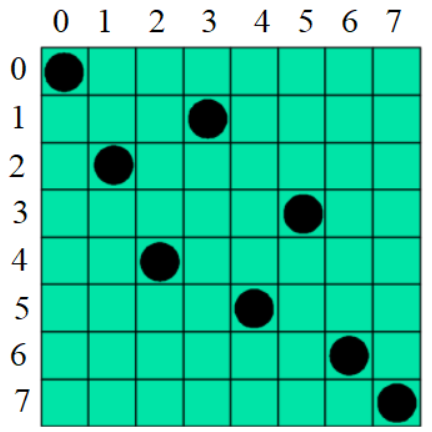
<br/>
**Genótipo**:
<br/>
O génotipo será uma string de bits composta por 8 sequencias de 3 bits, cada sequencia representa a posição de uma rainha na coluna.
<br/>
Logo, o fenótipo acima será representado por:
<br/>
000 010 100 001 101 011 101 111
<br/>

In [1]:
import pandas as pd
import numpy as np
import math
import os
import random

%run auxiliar_functions.ipynb

# Inicialização

Nossa Inicialização será aleatória, com tamanho de população 100.
<br/>
Além disso precisaremos fazer uma avaliação de fit inicial, checar se a condição de parada foi ativada e deixar salva.

In [2]:
#Gerar 100 populações aleatórias

initial_population = create_population(100, permutation_07)
initial_population_gen = population_to_gen(initial_population)


# Fitness Check

In [3]:
#Funções para calcular o Fit
def attack_check(member):
    for queen in member:
        
    return random.random()
    
def fit_check(member):
    return (1/(1+(attack_check(member))))

def fit_dictionary(population_fit, member):
    condition_met = False
    final_solution = []
    member_name = name_of(member)
    if member_name not in population_fit:
        population_fit[member_name] = fit_check(member)
        if population_fit[member_name] == 1:
            condition_met = True
            final_solution = member_name
    return condition_met, final_solution
    

# Avaliação do fit da população inicial

In [4]:
population_fit = {}
condition_met = False
final_solution = -1

for member in initial_population_gen:
    member_name = name_of(member)
    population_fit[member_name] = fit_check(member)
    if population_fit[member_name] == 1:
        condition_met = True
        final_solution = member_name
        
if condition_met:
    print("We got the answer, " + gen_to_fen(solution))

Agora os seguintes passos serão repetidos


*   Seleção de Pais
*   Possibilidade de Recombinação [90%]
*   Possibilidade de Mutação [40%]
*   Cálculo de Fitness
*   Checagem de condição de Término
*   Sobrevivência [Remove os 2 piores da população e insere os 2 filhos]



# Seleção de Pais

In [5]:
#Função para seleção de pais

def select_parents(population):
    parents = random.sample(population, 5)
    best_fit = 0
    best_fit_2 = 0
    for parent in parents:
        if population_fit[name_of(parent)] > best_fit:
            parent_1 = parent
            best_fit = population_fit[name_of(parent)]
    parents.remove(parent_1)
    for parent in parents:
        if population_fit[name_of(parent)] > best_fit_2:
            parent_2 = parent
            best_fit = population_fit[name_of(parent)]

    return [parent_1, parent_2]



# Possibilidade de Recombinação

In [6]:
#Função para Recombinação e chance inicial é de 90%
def recombination(parent_1, parent_2):
    children = []
    point_of_cut = random.randint(1,7)
    inverse_point = 8 - point_of_cut
    for element in range(point_of_cut):
        children.append(parent_1[element])
    
    for parent_element in range(len(parent_2)):
        present = False
        for children_element in range(len(children)):
            if(parent_2[parent_element] == children[children_element]):
                present = True
        if not present:
            children.append(parent_2[parent_element])
    
    return children

def recombination_chance(parent_1, parent_2):
    chance = random.random()
    if chance <= 0.9:
        children = recombination(parent_1, parent_2)
    else:
        if chance <= 0.5:
            children = parent_1
        else:
            children = parent_2
    return children


# Possibilidade de Mutação

In [7]:
#Função para Mutação
def mutation(member):
    element_1 = random.randint(0,7)
    options = [0,1,2,3,4,5,6,7]
    options.remove(element_1)
    element_2 = random.choice(options)
    aux = member[element_1]
    member[element_1] = member[element_2]
    member[element_2] = aux
    return member

def mutation_chance(member):
    chance = random.random()
    if chance <= 0.4:
        children = mutation(member)
    else:
        children = member
    return children


# Sobrevivência

In [8]:
#Função para substituição dos 2 piores da população pelos 2 novos gerados

def survival(population, population_fit, children_1, children_2):
    new_population = population
    new_population.append(children_1)
    new_population.append(children_2)
    
    smallest_fit = 1
    for member in new_population:
        if population_fit[name_of(member)] < smallest_fit:
            smallest_fit =  population_fit[name_of(member)]
            smallest_member = member
    new_population.remove(member)
    
    smallest_fit = 1
    for member in new_population:
        if population_fit[name_of(member)] < smallest_fit:
            smallest_fit =  population_fit[name_of(member)]
            smallest_member = member
    new_population.remove(member)
    
    return new_population
    



# Iteração
Aqui iteramos as funções diversas vezes até chegarmos em uma das condições de parada

In [11]:
#Iterar as funções até alcançar uma das condições de parada
population = initial_population_gen
iteration = 0

while iteration < 10:
    print('This is iteration: ' + str(iteration))
    #Iso gera parents[0] e parents[1], ambos pais dos próximos dois filhos
    parents = select_parents(population)
    print('We selected the parents')
    print('Parent 1: ' + str(parents[0]))
    print('Parent 2: ' + str(parents[1]))
    
    #Agora checo se ocorrerá recombinação com os dois filhos
    children_1 = recombination_chance(parents[0],parents[1])
    children_2 = recombination_chance(parents[0],parents[1])
    print('We created new children')
    print('Children 1: ' + str(children_1))
    print('Children 2: ' + str(children_2))
    
    #E checamos se ocorrerá mutação com esses filhos
    children_1 = mutation(children_1)
    children_2 = mutation(children_2)
    print('They may have mutated')
    print('Children 1: ' + str(children_1))
    print('Children 2: ' + str(children_2))
    
    #Checamos o fit e a condição de parada, e adicionamos ao dicionario de fits
    condition_met, final_solution = fit_dictionary(population_fit, children_1)
    print('Checking if children 1 got to the final solution')
    print(name_of(children_1))
    print(population_fit[name_of(children_1)])
    if not condition_met:
        condition_met, final_solution = fit_dictionary(population_fit, children_2)
        print('Checking if children 2 got to the final solution')
        print(name_of(children_2))
        print(population_fit[name_of(children_2)])
    #Agora checamos a sobrevivencia da população, eliminando os dois piores elementos
    population = survival(population, population_fit, children_1, children_2)
    print("A população tem " + str(len(population)) + " elementos")
    
    if condition_met == True:
        iteration = 10000
    iteration += 1

if condition_met:
    print("Conseguimos encontrar a solução, nossa solução foi: " + str(final_solution))
else:
    print("Não achamos uma solução :c")

This is iteration: 0
We selected the parents
Parent 1: ['110', '001', '010', '000', '011', '101', '111', '100']
Parent 2: ['000', '110', '111', '011', '001', '010', '101', '100']
We created new children
Children 1: ['110', '000', '111', '011', '001', '010', '101', '100']
Children 2: ['110', '001', '010', '000', '011', '101', '111', '100']
They may have mutated
Children 1: ['110', '000', '111', '011', '101', '010', '001', '100']
Children 2: ['110', '111', '010', '000', '011', '101', '001', '100']
Checking if children 1 got to the final solution
(6, 0, 7, 3, 5, 2, 1, 4)
0.7572632470144566
Checking if children 2 got to the final solution
(6, 7, 2, 0, 3, 5, 1, 4)
0.9906661938483512
A população tem 100 elementos
This is iteration: 1
We selected the parents
Parent 1: ['000', '111', '100', '011', '110', '101', '001', '010']
Parent 2: ['011', '000', '110', '101', '001', '010', '111', '100']
We created new children
Children 1: ['000', '111', '100', '011', '110', '101', '001', '010']
Children 2:

# Análise de Dados

A análise de dados tem como intenção responder as seguintes perguntas:
*  Em quantas execuções o algoritmo convergiu (nº/30 execuções);
*  Em que iteração o algoritmo convergiu (média e desvio padrão);
*  Número de indivíduos que convergiram por execução;
*  Fitness médio da população em cada uma das 30 execuções;
* Colocar gráficos de convergência com a média e o melhor indivíduo por iteração;
* Fitness médio alcançado nas 30 execuções (média e desvio padrão);
* Análise adicional: Quantas iterações são necessárias para toda a população convergir?

In [10]:
#Geração de dados e gráficos